In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
sample_input = open('Day 12.txt').read()

area = [list(row) for row in sample_input.split('\n\n')[0].split('\n')]
area = np.array(area)

starting_node = (np.where(area == 'S')[0][0], np.where(area == 'S')[1][0])
end_node = (np.where(area == 'E')[0][0], np.where(area == 'E')[1][0])

area[starting_node] = 'a'
area[end_node] = 'z'

In [3]:
def find_neighbors(arr, i, j):
    if i > 0 and j > 0 and arr.shape[0]-1 > i and arr.shape[1]-1 > j:  # middle
        return [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
    elif i == 0 and j == 0: # top left corner
        return [(1, 0), (0, 1)]
    elif i == 0 and j == arr.shape[1] - 1:  # right top corner
        return [(0, arr.shape[1]-2), (1, arr.shape[1]-1)]
    elif i == arr.shape[0]-1 and j == 0:  # left bottom corner
        return [(arr.shape[0]-2, 0), (arr.shape[0]-1, 1)]
    elif i == arr.shape[0]-1 and j == arr.shape[1]-1:  # right bottom corner
        return [(arr.shape[0]-2, arr.shape[1]-1), (arr.shape[0]-1, arr.shape[1]-2)]
    elif i == 0:  # top edge
        return [(0, j-1), (0, j+1), (1, j)]
    elif i == arr.shape[0] - 1:  # bottom edge
        return [(i, j-1), (i, j+1), (i-1, j)]
    elif j == 0:  # left edge
        return [(i-1, j), (i+1, j), (i, j+1)]
    elif j == arr.shape[1] - 1:  # right edge
        return [(i, j-1), (i+1, j), (i-1, j)]

In [4]:
G = nx.DiGraph()
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
        G.add_node((i, j), label=f'{i}, {j}')
        
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
        neigbhors = find_neighbors(area, i, j)
        for neighbor in neigbhors:
            if abs(ord(area[neighbor]) - ord(area[i, j])) <= 1 or ord(area[i, j]) < ord(area[neighbor]):
                G.add_edge(neighbor, (i, j))

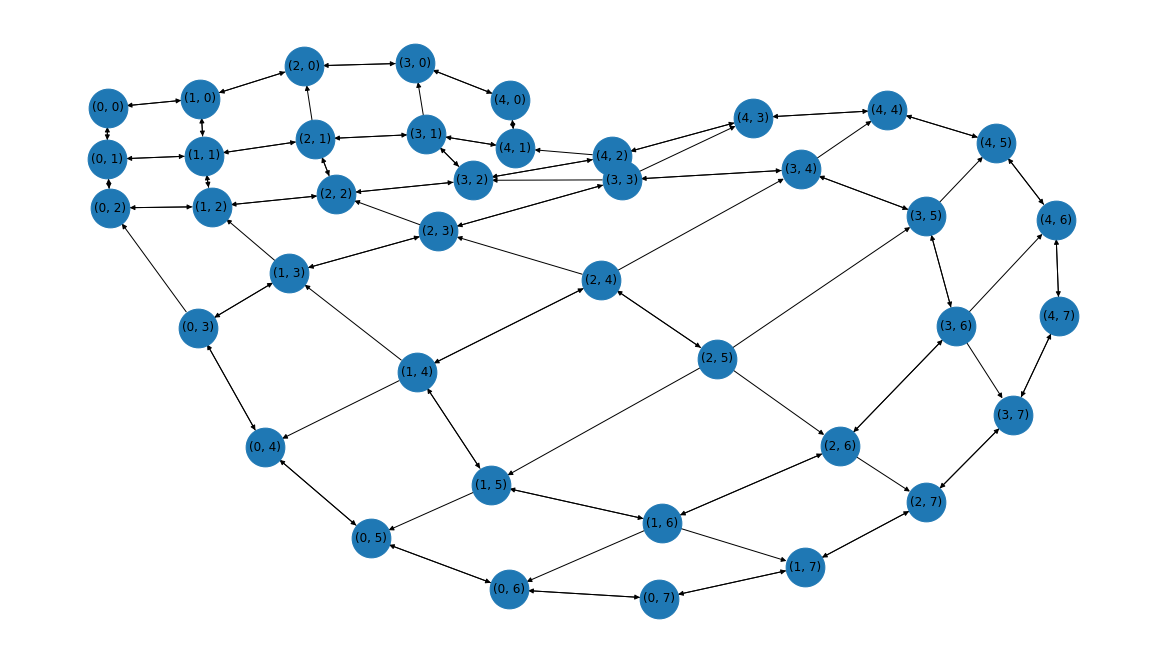

In [5]:
plt.figure(figsize=(16, 9))
nx.draw(G, with_labels=True, node_size=1500)

In [6]:
nx.shortest_path_length(G, starting_node, end_node, method='dijkstra')

31

In [7]:
sample_input = open('Day 12.txt').read()

area = [list(row) for row in sample_input.split('\n\n')[1].split('\n')]
area = np.array(area)

starting_node = (np.where(area == 'S')[0][0], np.where(area == 'S')[1][0])
end_node = (np.where(area == 'E')[0][0], np.where(area == 'E')[1][0])

area[starting_node] = 'a'
area[end_node] = 'z'

In [8]:
G = nx.DiGraph()
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
        G.add_node((i, j), label=f'{i}, {j}')
        
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
        neigbhors = find_neighbors(area, i, j)
        for neighbor in neigbhors:
            if abs(ord(area[neighbor]) - ord(area[i, j])) <= 1 or ord(area[i, j]) < ord(area[neighbor]):
                G.add_edge(neighbor, (i, j))

In [9]:
nx.shortest_path_length(G, starting_node, end_node, method='dijkstra')

447